In [1]:
import sys
sys.path.append("/users/PAS0654/osu8354/root6_18_build/lib") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.6/site-packages")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle, TFile
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree, gDirectory
import os
import matplotlib.patches as mpatches
import scipy.stats as stats


Welcome to JupyROOT 6.18/04


In [2]:
# energy_array=np.arange(16.0,21.5,0.5)
energy_array=[19.0]

ReferenceError: attempt to access a null-pointer

Error in <TFile::TFile>: file /users/PAS0654/osu8354/ARA_cvmfs/source/AraSim/outputs/nuAngles_19.0.root does not exist


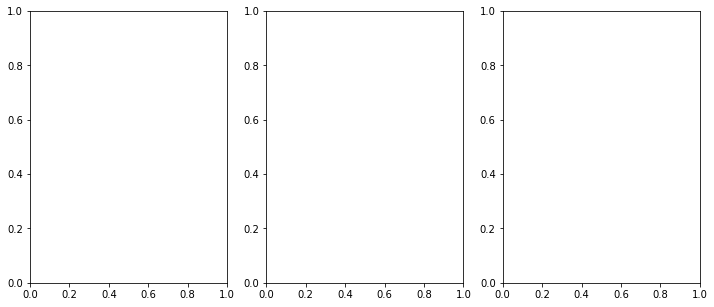

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

for energy in energy_array:
    f = ROOT.TFile.Open("/users/PAS0654/osu8354/ARA_cvmfs/source/AraSim/outputs/nuAngles_%0.1f.root"%energy)
    tree = f.Get('nuAngles_%0.0f_tree'% int(energy*2))
    print('nuAngles_%0.0f_tree'%int(energy*2))

    test=[]
    ang_forHist=[]
    nuWeights=[]
#     ang_cutoff=[]
    
    for event in range(tree.GetEntries()):
        tree.GetEntry(event)
        ang_forHist.append(tree.costheta)
        test.append(tree.tanphi)
        nuWeights.append(tree.weight)

#         if (np.degrees(tree.theta-np.pi/2)<-25):
#             ang_cutoff.append(np.degrees(tree.theta-np.pi/2))
    # plt.hist(np.cos(ang_forHist), bins=1000, density=True);
    # plt.ylim(0,5)
#     numBins=int(tree.GetEntries()/60)
    numBins=1000

    n, bins, patches = axes[0].hist(ang_forHist,weights=nuWeights, range=(-1, 0.5),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False);
    axes[1].hist(ang_forHist,weights=nuWeights, range=(-1, 1),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False,cumulative=True, density=True);
    axes[2].hist(ang_forHist,weights=nuWeights, range=(-1, 1),alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False,cumulative=True, density=True, label="$10^{%0.1f} $ eV" %energy);

# axes[1].set_title("Histogram of $\cos(\\theta_{rec})$", fontsize=12)
axes[0].axvline(-0.68, linestyle='--', color="green",label="Cen A position (zenith)",linewidth=2.8)
axes[1].axvline(-0.68, linestyle='--', color="green",linewidth=2.8)
axes[2].axvline(-0.68, linestyle='--', color="green",linewidth=2.8)


axes[0].set_xlabel("$\cos(\\theta_{rec})$", fontsize=12)
axes[1].set_xlabel("$\cos(\\theta_{rec})$", fontsize=12)
axes[2].set_xlabel("$\cos(\\theta_{rec})$", fontsize=12)

axes[0].set_ylabel("Counts [weighted]", fontsize=12)
axes[1].set_ylabel("Cumulative fraction [weighted]", fontsize=12)
axes[2].set_ylabel("Cumulative fraction [weighted]", fontsize=12)

axes[0].set_yscale("log")
axes[0].set_ylim(1E0, 1E3)
axes[0].grid(linestyle='--', linewidth=0.8)
axes[1].grid(linestyle='--', linewidth=0.8)
axes[2].grid(linestyle='--', linewidth=0.8)

axes[2].set_xlim(-1,0)
axes[2].set_ylim(0,0.2)
axes[0].set_title("Angular dist.")
axes[1].set_title("Cumulative dist.")
axes[2].set_title("Zoomed cumulative dist.")

fig.legend(ncol=6, loc=(0.21,0.01))

    # axes[1].set_yscale('log')
    # plt.legend()
fig.suptitle("Angular reconstrucion of simulated events with AraSim", fontsize=15)
fig.tight_layout(rect=[0, 0.09, 1, 0.95])
# fig.savefig("theta_rec_distro_CenA.png", dpi=200)

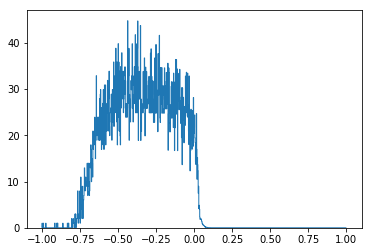

In [32]:
n, bins, patches = plt.hist(ang_forHist,weights=nuWeights,alpha=1.0, bins=numBins,histtype='step', stacked=True, fill=False);



In [33]:
np.average(n[300:500])

28.081203878643887

In [34]:
n=n/np.average(n[300:500])

In [35]:
for x in np.nditer(n, op_flags=['readwrite']):
    if (x[...]>1):
        x[...] = 1 

In [36]:
azimuth = np.linspace(0,360,1000)

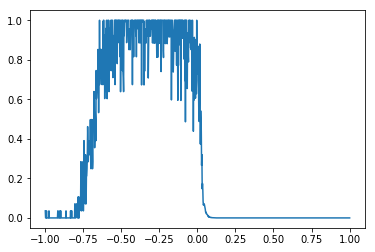

In [37]:
plt.plot(bins[1:],n);

In [38]:
n_double=np.tile(n,(1000,1))

In [39]:
X, Y = np.meshgrid(bins[1:],np.deg2rad(azimuth)-np.pi)
Z = n_double
# cp = plt.contourf(X, Y, Z, )
# plt.clim(0,1)
# plt.colorbar(cp)
# plt.clim(0,1)
# plt.contour(azimuth,np.arccos(bins[1:]),n_double)

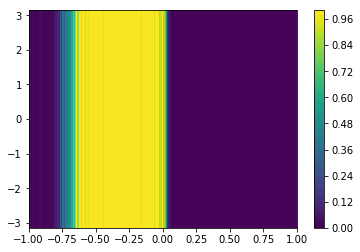

In [40]:
contours = plt.contourf(X, Y, Z,50)
plt.colorbar();
# plt.clim(0,1)


In [41]:
np.deg2rad(-45)

-0.7853981633974483

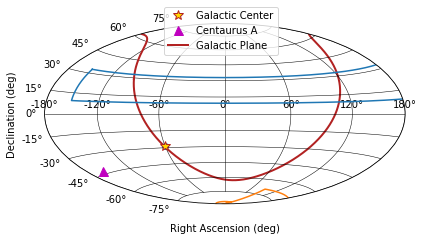

In [5]:
import sys
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.6/site-packages")
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import astropy.coordinates as coord
from astropy.io import ascii

data = ascii.read("analysis_window_clean_altaz_FOV_2018.04.11.csv")

ra = coord.Angle(data['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['Decl']*u.degree)

galactic_longitudes = np.arange(start=0, stop=360, step=0.1)
galactic_latitudes = [0] * len(galactic_longitudes)
icrs = SkyCoord(galactic_longitudes, galactic_latitudes, unit="deg", frame="galactic").icrs
gal_ra = icrs.ra
gal_ra = gal_ra.wrap_at(180*u.degree)
gal_dec = icrs.dec

gal_center_long = 180.
gal_center_lat = 0.
cena_long = 309.51589568
cena_lat = 19.41727350
icrs2 = SkyCoord(gal_center_long, gal_center_lat, unit="deg", frame="galactic").icrs
gal_center_ra = icrs2.ra
gal_center_ra = gal_center_ra.wrap_at(180*u.degree)
gal_center_dec = icrs2.dec

icrs3 = SkyCoord(cena_long, cena_lat, unit="deg", frame="galactic").icrs
#cena_ra = icrs3.ra
#cena_ra = cena_ra.wrap_at(180*u.degree)
#cena_dec = icrs3.dec
ra_gc=299.3*u.degree
dec_gc=-28.72* u.degree
ra_cena = 201.3625*u.degree
dec_cena = -43.0192*u.degree
c2 = SkyCoord(ra=ra_cena, dec=dec_cena, frame='icrs')
cena_ra = c2.ra.wrap_at(180 * u.deg).radian
cena_dec = c2.dec.radian

c = SkyCoord(ra=ra_gc, dec=dec_gc, frame='icrs')
fig = plt.figure()
ax = fig.add_subplot(111, projection="hammer")
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian
ax.grid(color='k', linestyle='solid', linewidth=0.5)
r = 90
#theta = np.arange(0,2*np.pi,0.1)
x = np.array([-np.pi,np.pi,np.pi,-np.pi,-np.pi])
y = np.array([0.05,0.05,-0.36,-0.36,0.05])
y2 = np.array([0.05,0.05,-0.52,-0.52,0.05])
y3 = np.array([-0.52,-0.52,-0.64,-0.64,-0.52])
#ax.plot(x,y)

# plt.fill(x,y2,label='60 m depth', facecolor='#8b9dc3',alpha=1)
# plt.fill(x,y3,label='Added reach at 100 m depth',alpha=1,facecolor='#3b5998')
plt.scatter(ra_rad,dec_rad)
plt.plot(ra_rad, dec_rad, '*',color='gold',markersize=11,mec='firebrick',label='Galactic Center')
ax.plot(cena_ra, cena_dec,'^',markersize=9,color='m',label='Centaurus A')
plt.plot(gal_ra.radian[0:2970], -gal_dec.radian[0:2970],color='firebrick',linewidth=2,label='Galactic Plane',zorder=1)
plt.plot(gal_ra.radian[2980:], -gal_dec.radian[2980:],color='firebrick',linewidth=2,zorder=2)
#ax.plot(x+np.pi/6,y+np.pi/6)
#ax.plot(x-np.pi/2,y-np.pi/2);
# plt.plot([-np.pi, np.pi], [-0.36, -0.36], '--',color='lightgreen', alpha=0.7)#15 m depth
# plt.contourf(Y,X,Z,50, alpha=0.8)
# plt.colorbar().set_label('Fraction of ARA\'s ideal FOV');
legend = ax.legend(loc='upper right')
legend.get_frame().set_facecolor('#ffe4c4')
plt.legend( bbox_to_anchor=(.66,.8))
ax.set_ylabel('Declination (deg)') #give it a title
ax.set_xlabel('Right Ascension (deg)',labelpad=20) #give it a title
ax.axes.get_xaxis().set_ticks([-np.pi/3, -2*np.pi/3, -np.pi,0,np.pi/3, 2*np.pi/3, np.pi])
# plt.annotate('15 m depth',xy=(np.pi, -0.36), xycoords='data',xytext=(.87, .3), textcoords='figure fraction',arrowprops=dict(arrowstyle="->", color='royalblue'),horizontalalignment='right', verticalalignment='top')
#ax.annotate('annotate', xy=(3, 0), xytext=(11, 4))
#plt.gca().set_aspect('0.8', adjustable='box')
plt.tight_layout()
# plt.savefig("SkyMap_CenA.png",dpi=300)
# ax.show()
# plt.scatter(0,-0.85)

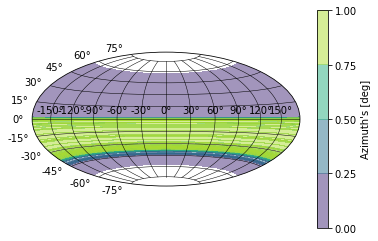

In [49]:
plt.figure()
ax = plt.subplot(111, projection = 'hammer')
figg = ax.contourf(Y,X,Z,3, alpha=0.5)
# plt.colorbar(figg);
ax.grid(color='k', linestyle='solid', linewidth=0.5)
plt.colorbar(figg).set_label('Azimuth\'s [deg]')
